In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa.seasonal as smts
from statsmodels.graphics.tsaplots import plot_acf

In [16]:
#Data
waste = pd.read_csv("C:\\Users\\emile\\OneDrive\\Documents\\Masterstudier\\ISEG\\WDL\\stage1\\Waste_Collection___Diversion_Report__daily_.csv")

waste['Load Time'] = pd.to_datetime(waste['Load Time'], format='%m/%d/%Y %H:%M:%S %p')

waste['Month'] = waste['Load Time'].dt.month
waste['Year'] = waste['Load Time'].dt.year
waste['Date'] = waste['Load Time'].dt.date

waste = waste.set_index(waste['Load Time'])

waste = waste.dropna()

population = pd.read_csv("C:\\Users\\emile\\OneDrive\\Documents\\Masterstudier\\ISEG\\WDL\\stage1\\population.csv", delimiter=";", decimal=",")

pop2021 = {'Year': 2021, 'Total area population': 937397, 'Annualized growth rate': 1.2}
population = population.append(pop2021, ignore_index=True)

popuation = population.dropna()

# Old Commands, dont know if needed again

In [ ]:
#remove outliers
for x in ['Load Weight']:
    q75,q25 = np.percentile(garbage_collections.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    garbage_collections.loc[garbage_collections[x] < min,x] = np.nan
    garbage_collections.loc[garbage_collections[x] > max,x] = np.nan

In [ ]:
a =[]
for i in waste['Load Type']:
    if i not in a:
        a.append(i)

In [ ]:
b = []
for i in a:
    x = waste[waste['Load Type'] == i]
    b.append([i, np.mean(x['Load Weight']), len(x['Load Weight'])])

b

# Using all Load Types and merging it with population

In [35]:
#Slice time horizon to '2021-06-30' since July has few observations
waste = waste.loc['2006-01-01': '2021-06-30']

<ipython-input-35-9a045f4ac7de>:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  waste = waste.loc['2006-01-01': '2021-06-30']


In [36]:
#Merge
m_waste = waste.merge(population, on='Year', how='left', indicator=True)

In [37]:
#Transform and create per-person waste production
m_waste['Load Time'] = pd.to_datetime(m_waste['Load Time'], format='%m/%d/%Y %H:%M:%S %p')
m_waste = m_waste.set_index(m_waste['Load Time'])
m_waste['Load Weight pp'] = m_waste['Load Weight'] / m_waste['Total area population']

# Monthly analysis

In [38]:
#Transform into monthly
pp_waste = m_waste['Load Weight pp'].resample('m').agg(['sum'])

<AxesSubplot:xlabel='Load Time'>

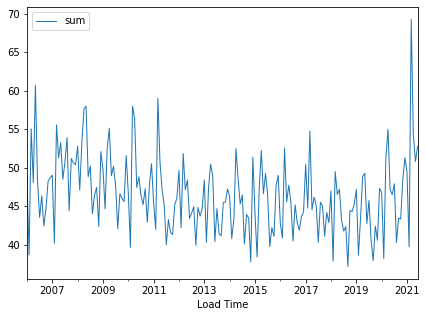

In [41]:
#Plot
plt.rcParams['figure.figsize'] = (7,5)
pp_waste.plot(linewidth = 1)

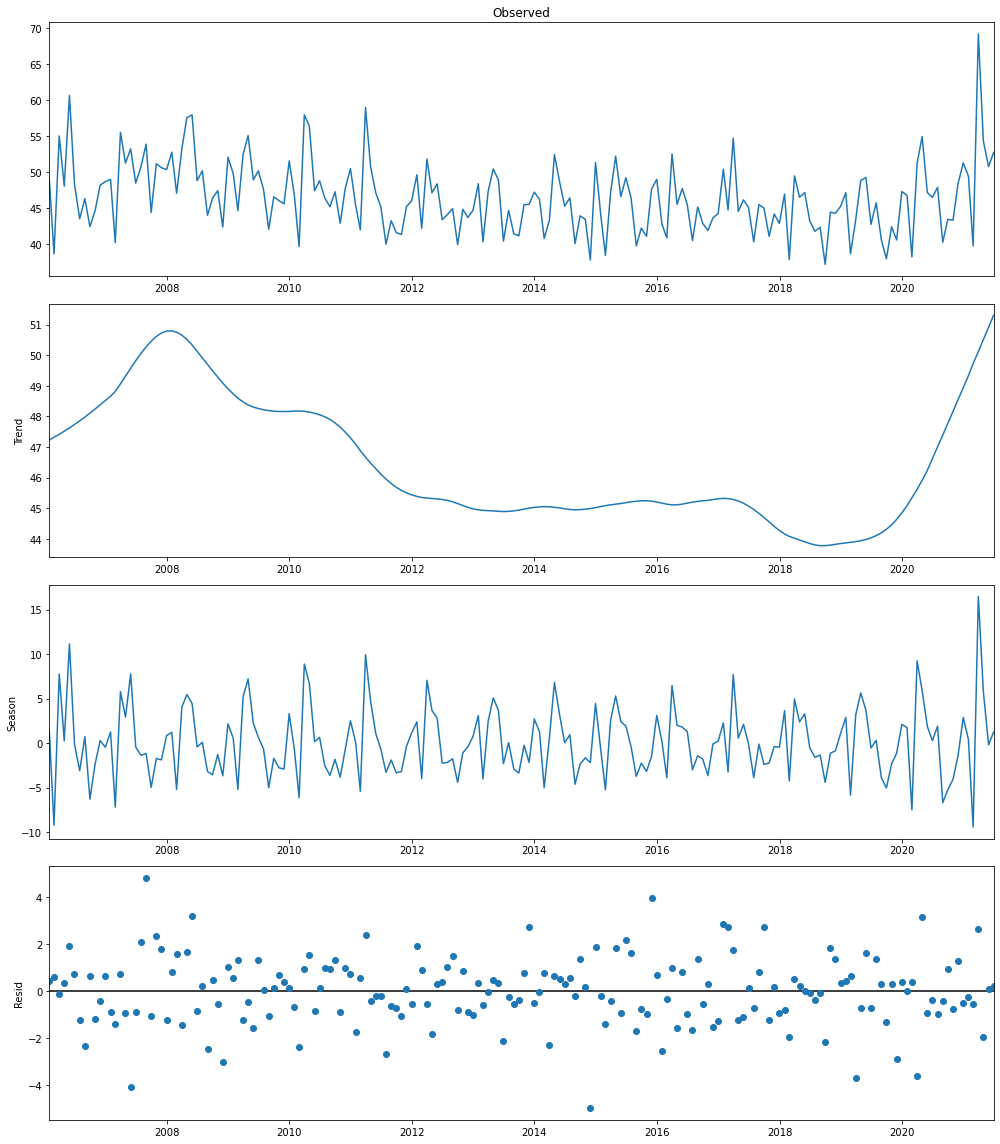

In [42]:
#Decomposed monthly data with STL, yearly seasonality, but seems to have two peaks per year

plt.rcParams['figure.figsize'] = (14,16)
stl_waste = smts.STL(pp_waste, seasonal = 5).fit()
stl_waste.plot()
plt.show()

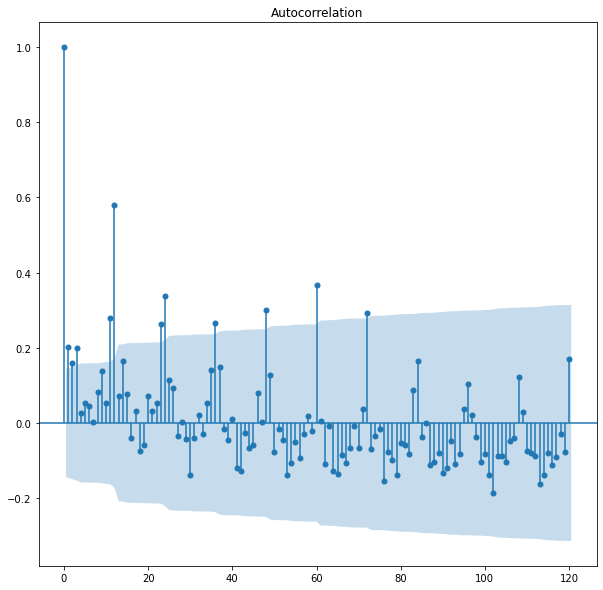

In [48]:
#ACF, 10 years of lag

plt.rcParams['figure.figsize'] = (10,10)
plot_acf(pp_waste, lags = 12*10)
plt.show()

<AxesSubplot:xlabel='Load Time'>

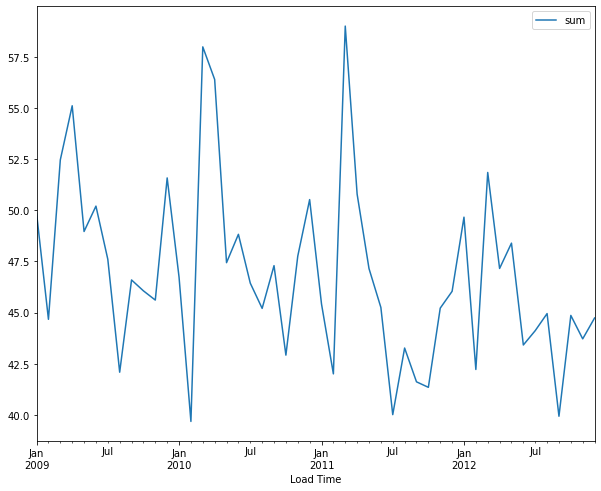

In [46]:
#Plot to inspect the seasonality
plt.rcParams['figure.figsize'] = (10,8)
pp_waste['2009' : '2012'].plot()

# Daily analysis

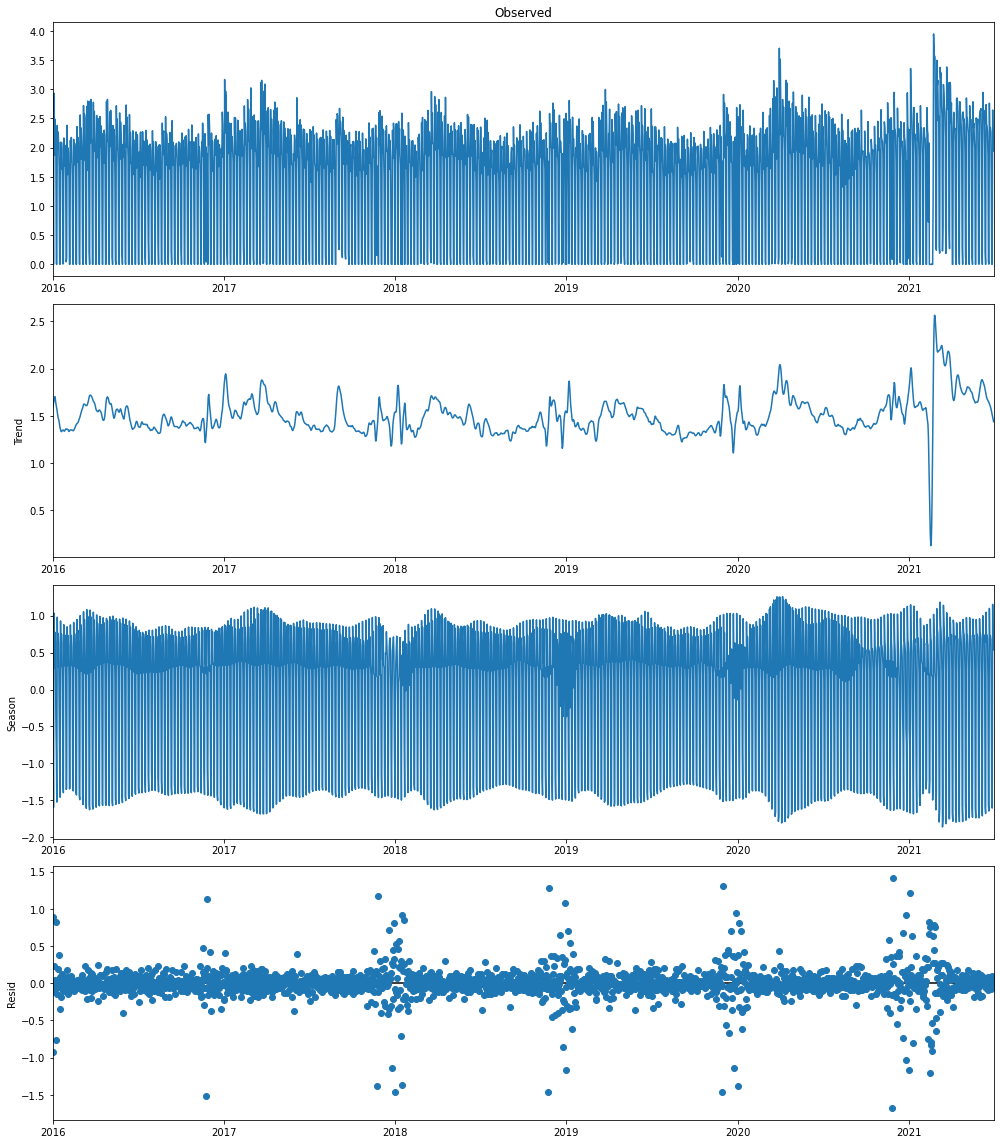

In [47]:
#Decomposing daily data, using a weekly season
#!Daily does not look good!

pp_daily_waste = m_waste['Load Weight pp'].resample('d').agg(['sum'])

plt.rcParams['figure.figsize'] = (14,16)
abc = smts.STL(pp_daily_waste['2016':], seasonal = 9).fit()
abc.plot()
plt.show()

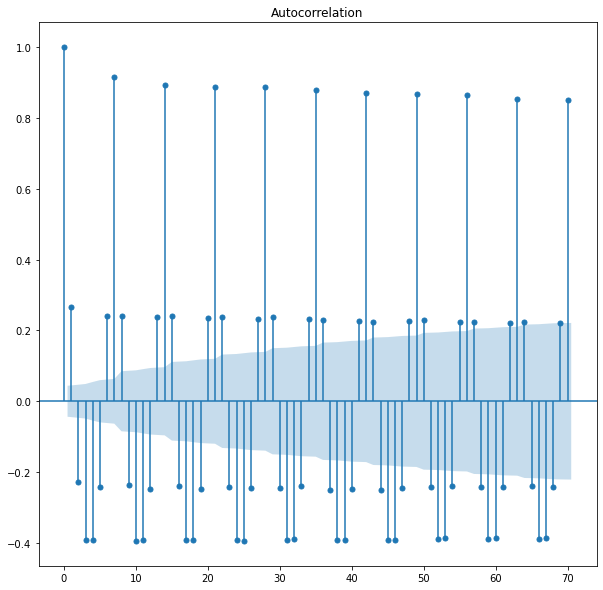

In [49]:
#ACF, daily, 10 weeks of lags

plt.rcParams['figure.figsize'] = (10,10)
plot_acf(pp_daily_waste, lags = 7*10)
plt.show()

In [ ]:
#Daily data does not look very good